## Observations and Insights 

### 1. Even distribution of mice and sex in the experiment
The bar and pie charts show that the experiment looks to be fairly equal in both number of mice in each regimen including the placebo and by sex with close to a 50/50 split. It might have been nice to see the distribution by sex for each regimen as wee


### 2. Outcome of Capomulin Regimen on Mouse s185
The Capomulin Regimen based on the chart of it's effect over time on mouse s185 does seem to be a good candidate for tumor reduction. It has a fairly steady negative correlation with the tumor volume over time.

### 3. Mouse Weight vs. Average Tumor Volume
While the chart, the r value fairly close to +1, and the r squared value inferring that around 70% of the observed variation can be explained, the correllation between the two still raises questions. Are the mice physically larger, or just fatter? What is the size distribution based on the sex of the mice. If the male mice tend to be larger, could that be something that is causing the correlation we are seeing?


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_results.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_results[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results.drop(mouse_results[mouse_results['Mouse ID'] == 'g989'].index)

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_mean = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_stats_median = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats_var = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats_std = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats_sem = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({'Mean': summary_stats_mean, 
                                 'Median': summary_stats_median, 
                                 'Variance': summary_stats_var, 
                                 'Standard Deviation': summary_stats_std, 
                                 'SEM': summary_stats_sem,})
summary_stats_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

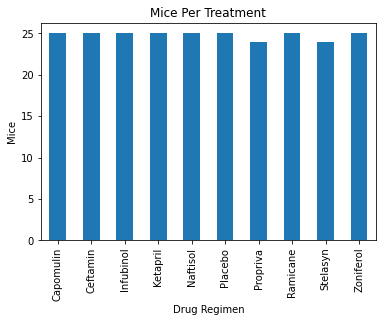

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_treatment_df = pd.DataFrame(mouse_results_clean.groupby('Drug Regimen')['Mouse ID'].nunique())

# Rename Mouse ID Column to Mice
mouse_per_treatment_rename_df = mouse_per_treatment_df.rename(columns={"Mouse ID": "Mice"})

# Create Bar Plot using Pandas
ax = mouse_per_treatment_rename_df.plot.bar(legend=False, title='Mice Per Treatment');
ax.set_xlabel('Drug Regimen');
ax.set_ylabel('Mice');

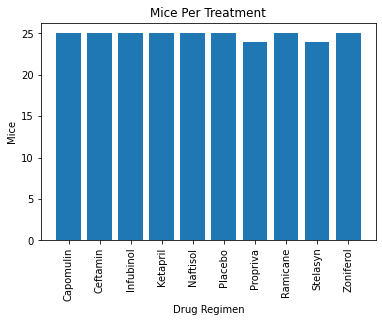

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_per_treatment_rename_reset_df = mouse_per_treatment_rename_df.reset_index()

fig2, ax2 = plt.subplots()
ax2.bar(mouse_per_treatment_rename_reset_df['Drug Regimen'], mouse_per_treatment_rename_reset_df['Mice'])
ax2.set(xlabel='Drug Regimen', ylabel='Mice', title='Mice Per Treatment')
ax2.tick_params(axis='x', rotation=90)

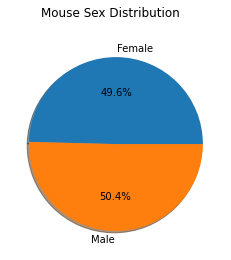

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_df = pd.DataFrame(mouse_results_clean.groupby('Sex')['Mouse ID'].nunique()).plot(kind='pie', subplots=True, shadow = True, autopct='%1.1f%%', legend=False, title='Mouse Sex Distribution');
plt.axis('off');

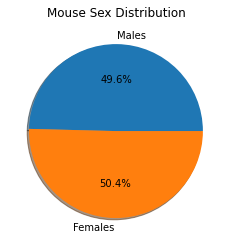

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Males', 'Females']
fig3, ax3 = plt.subplots()
ax3.pie(mouse_results_clean.groupby('Sex')['Mouse ID'].nunique(), labels=labels, shadow = True, autopct='%1.1f%%');
ax3.set(title='Mouse Sex Distribution');


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Breakup regimins into separate dataframes
capomulin_df = mouse_results_clean.loc[(mouse_results_clean['Drug Regimen'] == 'Capomulin'), :] 
ramicane_df = mouse_results_clean.loc[(mouse_results_clean['Drug Regimen'] == 'Ramicane'), :] 
infubinol_df = mouse_results_clean.loc[(mouse_results_clean['Drug Regimen'] == 'Infubinol'), :] 
ceftamin_df = mouse_results_clean.loc[(mouse_results_clean['Drug Regimen'] == 'Ceftamin'), :]

In [14]:
# Capomulin work

# Start by getting the last (greatest) timepoint for each mouse
capomulin_filtered_df = capomulin_df.sort_values('Timepoint', ascending = False)
capomulin_greatest_timepoint_df = capomulin_filtered_df.drop_duplicates(subset='Mouse ID', keep='first')

# Put data into a list
capomulin_tumor_volume = capomulin_greatest_timepoint_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
capomulin_quartiles = capomulin_tumor_volume.quantile([.25,.5,.75])
capomulin_lowerquar = capomulin_quartiles[0.25]
capomulin_upperquar = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperquar-capomulin_lowerquar
capomulin_lower_bound = capomulin_lowerquar - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperquar + (1.5 * capomulin_iqr)

print(f'''Values below {capomulin_lower_bound} could potentially be outliers.
Values above {capomulin_upper_bound} could potentially be outliers.''')

Values below 20.70456164999999 could potentially be outliers.
Values above 51.83201549 could potentially be outliers.


In [15]:
# Ramicane work

# Start by getting the last (greatest) timepoint for each mouse
ramicane_filtered_df = ramicane_df.sort_values('Timepoint', ascending = False)
ramicane_greatest_timepoint_df = ramicane_filtered_df.drop_duplicates(subset='Mouse ID', keep='first')

# Put data into a list
ramicane_tumor_volume = ramicane_greatest_timepoint_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
ramicane_quartiles = ramicane_tumor_volume.quantile([.25,.5,.75])
ramicane_lowerquar = ramicane_quartiles[0.25]
ramicane_upperquar = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperquar-ramicane_lowerquar
ramicane_lower_bound = ramicane_lowerquar - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upperquar + (1.5 * ramicane_iqr)

print(f'''Values below {ramicane_lower_bound} could potentially be outliers.
Values above {ramicane_upper_bound} could potentially be outliers.''')

Values below 17.912664470000003 could potentially be outliers.
Values above 54.30681135 could potentially be outliers.


In [16]:
# Infubinol work

# Start by getting the last (greatest) timepoint for each mouse
infubinol_filtered_df = infubinol_df.sort_values('Timepoint', ascending = False)
infubinol_greatest_timepoint_df = infubinol_filtered_df.drop_duplicates(subset='Mouse ID', keep='first')

# Put data into a list
infubinol_tumor_volume = infubinol_greatest_timepoint_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
infubinol_quartiles = infubinol_tumor_volume.quantile([.25,.5,.75])
infubinol_lowerquar = infubinol_quartiles[0.25]
infubinol_upperquar = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperquar-infubinol_lowerquar
infubinol_lower_bound = infubinol_lowerquar - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperquar + (1.5 * infubinol_iqr)

print(f'''Values below {infubinol_lower_bound} could potentially be outliers.
Values above {infubinol_upper_bound} could potentially be outliers.''')

Values below 36.83290494999999 could potentially be outliers.
Values above 82.74144559000001 could potentially be outliers.


In [17]:
# Ceftamin work

# Start by getting the last (greatest) timepoint for each mouse
ceftamin_filtered_df = ceftamin_df.sort_values('Timepoint', ascending = False)
ceftamin_greatest_timepoint_df = ceftamin_filtered_df.drop_duplicates(subset='Mouse ID', keep='first')

# Put data into a list
ceftamin_tumor_volume = ceftamin_greatest_timepoint_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
ceftamin_quartiles = ceftamin_tumor_volume.quantile([.25,.5,.75])
ceftamin_lowerquar = ceftamin_quartiles[0.25]
ceftamin_upperquar = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperquar-ceftamin_lowerquar
ceftamin_lower_bound = ceftamin_lowerquar - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperquar + (1.5 * ceftamin_iqr)

print(f'''Values below {ceftamin_lower_bound} could potentially be outliers.
Values above {ceftamin_upper_bound} could potentially be outliers.''')

Values below 25.355449580000002 could potentially be outliers.
Values above 87.66645829999999 could potentially be outliers.


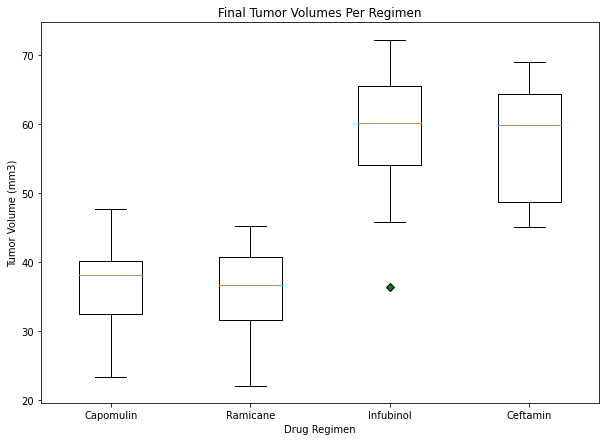

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_data = [capomulin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, ceftamin_tumor_volume]
regimen_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
custom_outlier = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots(figsize=(10,7));
ax3.boxplot(regimen_data, labels=regimen_labels, flierprops=custom_outlier);
ax3.set(xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)', title='Final Tumor Volumes Per Regimen');

## Line and Scatter Plots

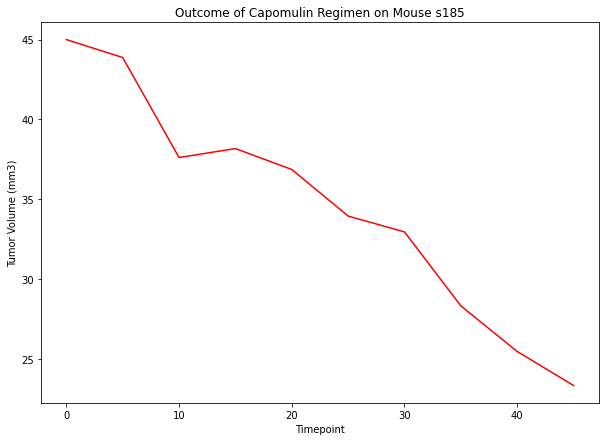

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185',:]


fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.plot(s185_df['Timepoint'], s185_df['Tumor Volume (mm3)'], color="r")
ax4.set(xlabel='Timepoint', ylabel='Tumor Volume (mm3)', title='Outcome of Capomulin Regimen on Mouse s185');




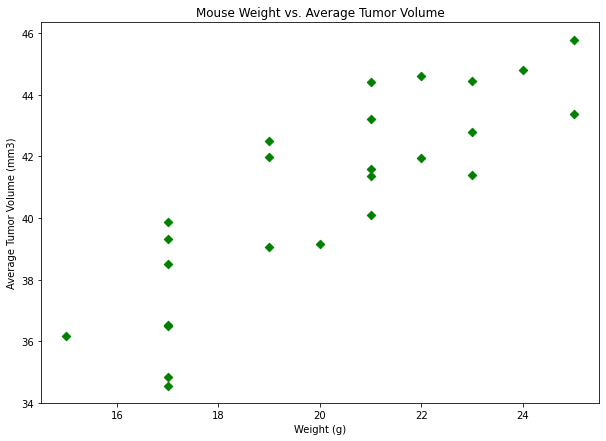

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Calculate the average tumor volume
avg_tumor_volume_df = capomulin_df.groupby(['Mouse ID']).mean()

# Generate plot
fig5, ax5 = plt.subplots(figsize=(10, 7))
ax5.scatter(avg_tumor_volume_df['Weight (g)'],avg_tumor_volume_df['Tumor Volume (mm3)'], marker='D', color='g')
ax5.set(xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)', title='Mouse Weight vs. Average Tumor Volume');

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'])
regression_values = avg_tumor_volume_df['Weight (g)'] * slope + intercept

# Make a variable for the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'''
slope = {slope}
intercept = {intercept}
rvalue or the correlation coefficient = {rvalue}
The r-squared value is: {rvalue**2}
''')



slope = 0.9544396890241045
intercept = 21.552160532685015
rvalue or the correlation coefficient = 0.8419363424694718
The r-squared value is: 0.7088568047708717



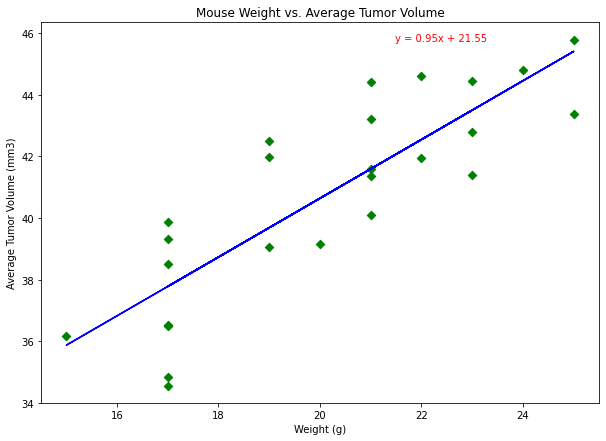

In [30]:
# Plot the linear regression

fig6, ax6 = plt.subplots(figsize=(10, 7))
ax6.scatter(avg_tumor_volume_df['Weight (g)'],avg_tumor_volume_df['Tumor Volume (mm3)'], marker='D', color='g')
ax6.plot(avg_tumor_volume_df['Weight (g)'], regression_values, "b-")
ax6.set(xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)', title='Mouse Weight vs. Average Tumor Volume');
ax6.annotate(line_eq, xy=(22, 37), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', color="red");
